# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

# Assigment 3 Monte-Carlo-Simulation 
---
### 1a) Nominaler Zustand

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000 #Anzahl Federspeicher
P = 8 #Anzahl Federn Pro Paket 
i=2.6 # Übersetzungsrate

rng = np.random.default_rng()


Zu beginn erzeugen wir  $N=10^4$ stochastisch unabhängige Federpackete aus jeweils P=8 Federn mit der Numpy.random Funktion

In [3]:
def Simulation_Einzelfedern(N, P, use_c3_b=False):
    c1_values = np.random.uniform(low=80, high=120, size=(N, P))
    c2_values = np.random.uniform(low=120, high=180, size=(N, P))

    if use_c3_b:
        c3_values = np.random.uniform(low=160, high=200, size=(N, P))
    else:
        c3_values = np.random.uniform(low=160, high=240, size=(N, P))

    return c1_values, c2_values, c3_values

Nun werden die Simulierten Federn getestet, indem die Funktion mit dem Wert N=1 und P=8 aufgerufen wird.  

In [4]:
Simulation_Einzelfedern(1,8,True)[2]


array([[183.29404442, 194.67026805, 161.82788046, 164.90676898,
        198.36592326, 175.99395557, 185.24926513, 161.82936301]])

Zu erkennen ist das jeweiles 8 einzelne Federn generiert werden, welche einen Zufälligen Wert im Toleranz Bereich erhalten. 

Nun wird eine Funktion erstellt, womit die Federrate ausgerechnet wird. Hiefür wird eine if bedingung genutzt damit variable Parameter in der Funktion später genutzt werden können.

In [5]:
def Gesamtfederrate(N, P, use_c3_b=False):
    c1_values, c2_values, c3_values = Simulation_Einzelfedern(N, P)

    if use_c3_b:
        c3_b_values = Simulation_Einzelfedern(N, P,True)[2]  # Erhalte nur die c3_b-Werte
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_b_values, axis=1)
    else:
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_values, axis=1)

    return c_gesamt

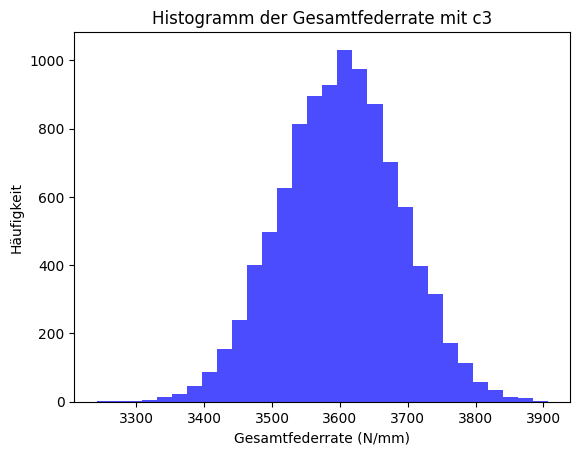

 Durchschnittliche Federrate: 3600.86 N/mm
 Varianz: 7623.22 (N/mm)²
 Standartabweichung: 87.31 N/mm 


In [6]:
c_gesamt_c3 = Gesamtfederrate(N, P, use_c3_b=False)
plt.hist(c_gesamt_c3, bins=30, color='blue', alpha=0.7)
plt.title('Histogramm der Gesamtfederrate mit c3')
plt.xlabel('Gesamtfederrate (N/mm)')
plt.ylabel('Häufigkeit')
plt.show()

print(f" Durchschnittliche Federrate: {round(np.mean(c_gesamt_c3),2)} N/mm")
print(f" Varianz: {round(np.var(c_gesamt_c3),2)} (N/mm)²")
print(f" Standartabweichung: {round(np.std(c_gesamt_c3),2)} N/mm ")

---
## 1b) Nominaler Zustand mit Einschränkung von c3 < $200 N/mm$
### hier reicht ein einfacher Aufruf der Funktion von 1a) mit dem verändertem Parameter use_c3_b = True 

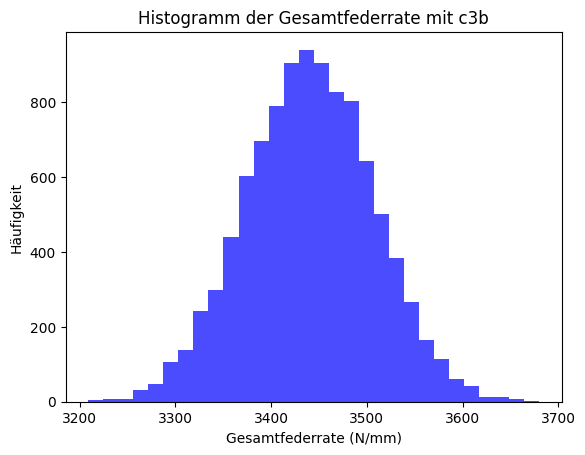

Durchschnittliche Federrate: 3440.21 N/mm
Varianz: 4396.21 (N/mm)²
Standardabweichung: 66.3 N/mm


In [7]:
c_gesamt_c3b = Gesamtfederrate(N, P, use_c3_b=True)

# Histogramm erstellen
plt.hist(c_gesamt_c3b, bins=30, color='blue', alpha=0.7)
plt.title('Histogramm der Gesamtfederrate mit c3b')
plt.xlabel('Gesamtfederrate (N/mm)')
plt.ylabel('Häufigkeit')
plt.show()

# Statistische Kennzahlen ausgeben
print(f"Durchschnittliche Federrate: {round(np.mean(c_gesamt_c3b), 2)} N/mm")
print(f"Varianz: {round(np.var(c_gesamt_c3b), 2)} (N/mm)²")
print(f"Standardabweichung: {round(np.std(c_gesamt_c3b), 2)} N/mm")

# 2a) Bestimmung der Kräfte


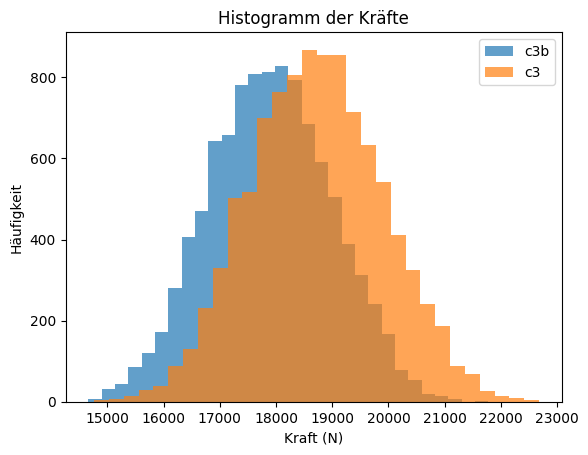

Statistiken für c3:
Durchschnittliche Kraft: 18725.83 N
Varianz: 1384669.87 N²
Standardabweichung: 1176.72 N

Statistiken für c3b:
Durchschnittliche Kraft: 17890.21 N
Varianz: 1186598.44 N²
Standardabweichung: 1089.31 N


In [8]:
d = rng.uniform(low=-0.05, high=0.05, size=N)
h1 = rng.uniform(low=-0.05, high=0.05, size=N)
h2 = rng.uniform(low=-0.05, high=0.05, size=N)
l = rng.uniform(low=-0.05, high=0.05, size=N)

# Berechne Kräfte für c3 und c3b
Fa_c3 = c_gesamt_c3 * 2 * i * (1 + d + h1 + h2 + l)
Fa_c3b = c_gesamt_c3b * 2 * i * (1 + d + h1 + h2 + l)

# Statistiken für c3
avg_Fa_c3 = np.mean(Fa_c3)
var_Fa_c3 = np.var(Fa_c3)
std_Fa_c3 = np.std(Fa_c3)

# Statistiken für c3b
avg_Fa_c3b = np.mean(Fa_c3b)
var_Fa_c3b = np.var(Fa_c3b)
std_Fa_c3b = np.std(Fa_c3b)

# Histogramme
plt.hist(Fa_c3b, bins=30, alpha=0.7, label='c3b')
plt.hist(Fa_c3, bins=30, alpha=0.7, label='c3')

plt.title('Histogramm der Kräfte')
plt.xlabel('Kraft (N)')
plt.ylabel('Häufigkeit')
plt.legend()  # Füge eine Legende hinzu
plt.show()

# Ausgabe der Statistiken
print("Statistiken für c3:")
print(f"Durchschnittliche Kraft: {round(avg_Fa_c3, 2)} N")
print(f"Varianz: {round(var_Fa_c3, 2)} N²")
print(f"Standardabweichung: {round(std_Fa_c3, 2)} N")

print("\nStatistiken für c3b:")
print(f"Durchschnittliche Kraft: {round(avg_Fa_c3b, 2)} N")
print(f"Varianz: {round(var_Fa_c3b, 2)} N²")
print(f"Standardabweichung: {round(std_Fa_c3b, 2)} N")

In [9]:
threshold = 18000  

Fa_c3_below_threshold = Fa_c3[Fa_c3 < threshold]
Fa_c3b_below_threshold = Fa_c3b[Fa_c3b < threshold]

percentage_difference = ((np.mean(Fa_c3b_below_threshold) - np.mean(Fa_c3_below_threshold)) / np.mean(Fa_c3_below_threshold)) * 100

print(f"Prozentualer Unterschied der Kräfte unter {threshold/1000} kN zwischen c3 und c3b: {round(percentage_difference, 2)}%")


Prozentualer Unterschied der Kräfte unter 18.0 kN zwischen c3 und c3b: -1.39%


###